Demonstration of the transformation laws for probability density functions.

(tv) 2015-19-11, 2024-04-24

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [52]:
trials = 5000000

In [53]:
rng = np.random.default_rng()

First, generate a set of uniformly distributed random numbers in the interval [0,1[

In [54]:
x = rng.uniform(size=trials)

Obtaining the Cauchy distribution: transform the uniform numbers with a tan function:

In [55]:
y = np.tan(np.pi*x)

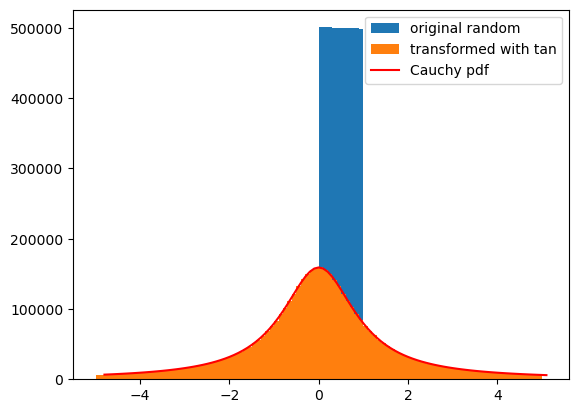

In [56]:
plt.hist(x, density=False, label='original random')
n,bins,patches = plt.hist(y, density=False, bins=100, range=(-5,5), label='transformed with tan')
centers = bins[1:]+np.diff(bins)
plt.plot(centers, 1./np.pi/(1+centers*centers) * trials/(bins[-1]-bins[0]),'r-',label='Cauchy pdf')
plt.legend()
plt.show()

We now demonstrate the generation of Gaussian-distributed random numbers from uniform ones. The transform law of pdfs suggests to transform according to cos, sin. This will draw two random numbers for each Gaussian one that we want, but it will also yield two Gaussian numbers.

In [120]:
trials = 5000

In [121]:
def gaussian_transform(size=1):
    x1,x2 = rng.uniform(size=(2,size))
    y1 = np.sqrt(-2.*np.log(x1))*np.cos(2.*np.pi*x2)
    y2 = np.sqrt(-2.*np.log(x1))*np.sin(2.*np.pi*x2)
    return y1,y2

In [122]:
y1,y2 = gaussian_transform(size=trials)

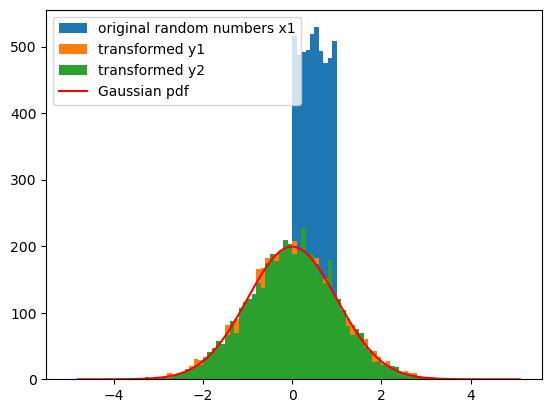

In [123]:
plt.hist(x1, label='original random numbers x1')
n,bins,patches = plt.hist(y1, bins=100, range=(-5,5), label='transformed y1')
plt.hist(y2, bins=100, range=(-5,5), label='transformed y2')
centers = bins[1:]+np.diff(bins)
pdf = 1./np.sqrt(2*np.pi)*np.exp(-centers*centers/2) * trials/(bins[-1]-bins[0])
plt.plot(centers, pdf, 'r-', label='Gaussian pdf')
plt.legend()
plt.show()

Often, the transform evaluating trigonometric functions is numerically expensive. It might be better to resort to algorithms that are based on Monte Carlo ideas (sampling uniformly in a square, throwing away everything that is not in a circle, turning that into a Gaussian). Various algorithms exist, the most advanced (often using hardware acceleration) being the so-called Ziggurat algorithm. Somewhat easier to understand is the Marsaglia-Tsang algorithm (and its close cousin, the Box-Muller algorithm):

In [146]:
trials=10000000 # larger again to do performance tests

In [147]:
def marsaglia_tsang(target_size=1):
    u,v = rng.uniform(size=(2,target_size)) * 2 - 1
    s = u**2 + v**2
    return np.sqrt(-2*np.log(s[s<=1])/s[s<=1])*u[s<=1]

In [148]:
t = time.process_time()
ms = marsaglia_tsang(target_size=trials)
dt = time.process_time() - t

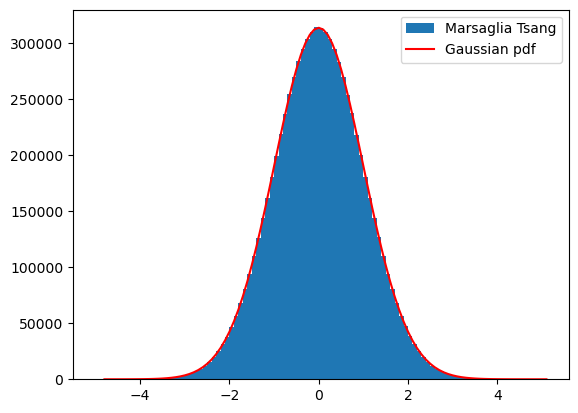

In [149]:
n,bins,patches = plt.hist(ms, bins=100, range=(-5,5), label='Marsaglia Tsang')
centers = bins[1:]+np.diff(bins)
pdf = 1./np.sqrt(2*np.pi)*np.exp(-centers*centers/2) * len(ms)/(bins[-1]-bins[0])
plt.plot(centers, pdf, 'r-', label='Gaussian pdf')
plt.legend()
plt.show()

In [150]:
t = time.process_time()
np.array(gaussian_transform(size=len(ms)))
dtcmp = time.process_time() - t

In [151]:
print("Marsaglia-Tsang took dt={:.4f}s, success rate {:.1f}%; direct took dt={:.4f}s".format(dt,100*len(ms)/trials,dtcmp))

Marsaglia-Tsang took dt=0.5974s, success rate 78.5%; direct took dt=0.6058s


Depending on your computer and circumstances, the algorithms should perform equally well (adjusting both to return the same number of variables), even though Marsaglia-Tsang "throws away" quite a substantial amount of values.

_Note:_ Think why the success rate approaches around 78.6%. _Hint:_ Compare to the value $\pi/4$.